In [1]:
#Automatic reload
%load_ext autoreload
%autoreload 2

In [2]:
#Import library packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from scipy import stats
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('../data/raw/Volcano.csv')

In [4]:
df.shape

(192, 21)

In [5]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

              Year          Mo          Dy    Latitude   Longitude   
count   192.000000  190.000000  181.000000  192.000000  192.000000  \
mean   2004.890625    6.373684   15.718232    9.176896   51.967349   
std       9.727896    3.439937    9.268414   21.820449  103.813113   
min    1990.000000    1.000000    1.000000  -45.900000 -177.920000   
25%    1996.000000    4.000000    7.000000   -6.818250  -62.180000   
50%    2006.000000    6.000000   16.000000    3.170000  110.446000   
75%    2014.000000    9.000000   24.000000   19.421000  129.081000   
max    2020.000000   12.000000   31.000000   64.416000  177.180000   

       Elevation (m)         VEI       Deaths    Missing     Injuries   
count     192.000000  116.000000   117.000000    4.00000    45.000000  \
mean     2182.630208    2.517241    40.145299   69.25000    69.844444   
std      1309.106571    1.017095   194.123817  108.32782   298.497827   
min         0.000000    1.000000     1.000000    1.00000     1.000000   
25% 

## **Data Cleaning**

In [6]:
df_cleaned = df.copy()

In [7]:
df_cleaned.columns

Index(['Year', 'Mo', 'Dy', 'Name', 'Location', 'Country', 'Latitude',
       'Longitude', 'Elevation (m)', 'Type', 'VEI', 'Deaths', 'Missing',
       'Injuries', 'Damage ($Mil)', 'Houses Destroyed', 'Total Deaths',
       'Total Missing', 'Total Injuries', 'Total Damage ($Mil)',
       'Total Houses Destroyed'],
      dtype='object')

In [8]:
# Get column names containing "description"
columns_to_drop = [col for col in df.columns if 'DESCRIPTION' in col.lower()]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df_cleaned)

     Year    Mo    Dy                   Name           Location      Country   
0    1990   2.0   2.0              Sheveluch          Kamchatka       Russia  \
1    1990   2.0  10.0                  Kelud               Java    Indonesia   
2    1990   3.0  26.0                 Asosan       Kyushu-Japan        Japan   
3    1990   4.0  18.0                 Asosan       Kyushu-Japan        Japan   
4    1990   5.0  29.0               Coropuna               Peru         Peru   
..    ...   ...   ...                    ...                ...          ...   
187  2019   7.0   3.0              Stromboli              Italy        Italy   
188  2019   8.0  28.0              Stromboli              Italy        Italy   
189  2019  12.0   9.0  Whakaari/White Island        New Zealand  New Zealand   
190  2020   1.0  12.0                   Taal  Luzon-Philippines  Philippines   
191  2020   5.0  29.0                   Ijen               Java    Indonesia   

     Latitude  Longitude  Elevation (m)

In [9]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop duplicate records
df_cleaned.drop_duplicates(inplace=True)

Missing Values:
Year                        0
Mo                          2
Dy                         11
Name                        0
Location                    0
Country                     0
Latitude                    0
Longitude                   0
Elevation (m)               0
Type                        0
VEI                        76
Deaths                     75
Missing                   188
Injuries                  147
Damage ($Mil)             179
Houses Destroyed          178
Total Deaths               74
Total Missing             188
Total Injuries            149
Total Damage ($Mil)       176
Total Houses Destroyed    177
dtype: int64


In [10]:
# Exclude non-numeric columns before calculating mean
numeric_columns = df_cleaned.select_dtypes(include='number').columns
df_cleaned_filled = df_cleaned.copy()
df_cleaned_filled[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Display the updated DataFrame
print(df_cleaned_filled)

     Year    Mo    Dy                   Name           Location      Country   
0    1990   2.0   2.0              Sheveluch          Kamchatka       Russia  \
1    1990   2.0  10.0                  Kelud               Java    Indonesia   
2    1990   3.0  26.0                 Asosan       Kyushu-Japan        Japan   
3    1990   4.0  18.0                 Asosan       Kyushu-Japan        Japan   
4    1990   5.0  29.0               Coropuna               Peru         Peru   
..    ...   ...   ...                    ...                ...          ...   
187  2019   7.0   3.0              Stromboli              Italy        Italy   
188  2019   8.0  28.0              Stromboli              Italy        Italy   
189  2019  12.0   9.0  Whakaari/White Island        New Zealand  New Zealand   
190  2020   1.0  12.0                   Taal  Luzon-Philippines  Philippines   
191  2020   5.0  29.0                   Ijen               Java    Indonesia   

     Latitude  Longitude  Elevation (m)

In [11]:
# Select non-numeric columns
non_numeric_columns = df_cleaned.select_dtypes(exclude='number').columns

# Display contents of non-numeric columns
for col in non_numeric_columns:
    print(f"Contents of column '{col}':")
    print(df_cleaned[col].unique())
    print()

Contents of column 'Name':
['Sheveluch' 'Kelud' 'Asosan' 'Coropuna' 'Rabaul' 'Santa Maria'
 'Nyiragongo' 'Unzendake' 'Pinatubo' 'Mutnovsky' 'Karthala'
 'Hudson, Cerro' 'Lokon-Empung' 'Etna' 'Karangetang'
 'Dieng Volcanic Complex' 'Negro, Cerro' 'Marapi' 'Spurr' 'Semeru'
 'Galeras' 'Wurlali' 'Mayon' 'Guagua Pichincha' 'Kilauea' 'Krakatau'
 'Yasur' 'Huila, Nevado del' 'Rinjani' 'Merapi' 'Yakedake' 'Fogo' 'Pacaya'
 'Kelimutu' 'Parker' 'Karymsky' 'Popocatepetl' 'Kanlaon' 'Sumisujima'
 'Maderas' 'Grimsvotn' 'Manam' 'Soufriere Hills' 'Hakkodasan'
 'Adatarayama' 'San Cristobal' 'Fuego' 'Tungurahua' 'Miyakejima' 'Arenal'
 'Stromboli' 'Reventador' 'Egon' 'Tengger Caldera' 'Santa Ana'
 'Raoul Island' 'Bulusan' 'Ritter Island' 'Salak' 'Tair, Jebel at'
 'Chaiten' 'Kasatochi' 'Redoubt' 'Eyjafjallajokull' 'Zealandia Bank'
 'Sinabung' 'Kirishimayama' 'Puyehue-Cordon Caulle' 'Nabro' 'Katla'
 'Gamalama' 'Tolbachik' 'Paluweh' 'Ubinas' 'Aira' 'Okataina' 'Ontakesan'
 'Calbuco' 'Yellowstone' 'Campi Flegrei

# **Time Trends**

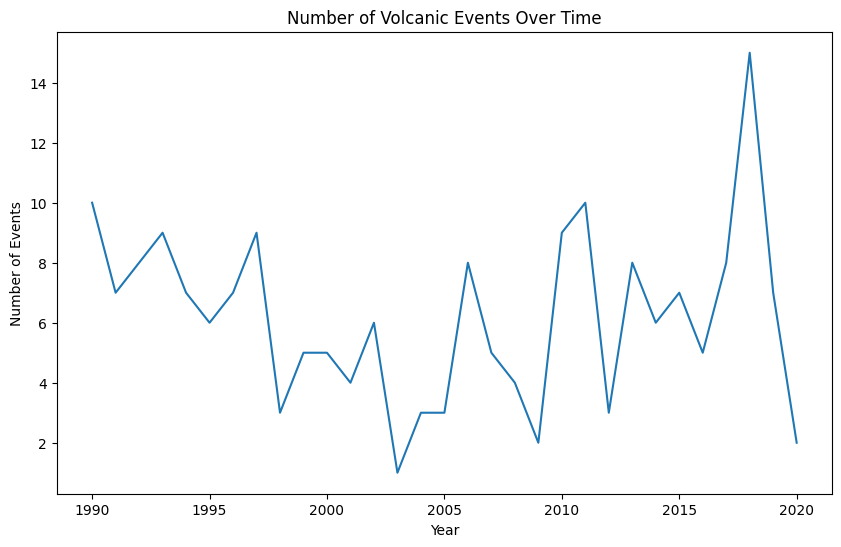

In [12]:
# Plot number of volcanic events over time
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Year').size().plot(kind='line')
plt.title('Number of Volcanic Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

# **Categorical Variables**

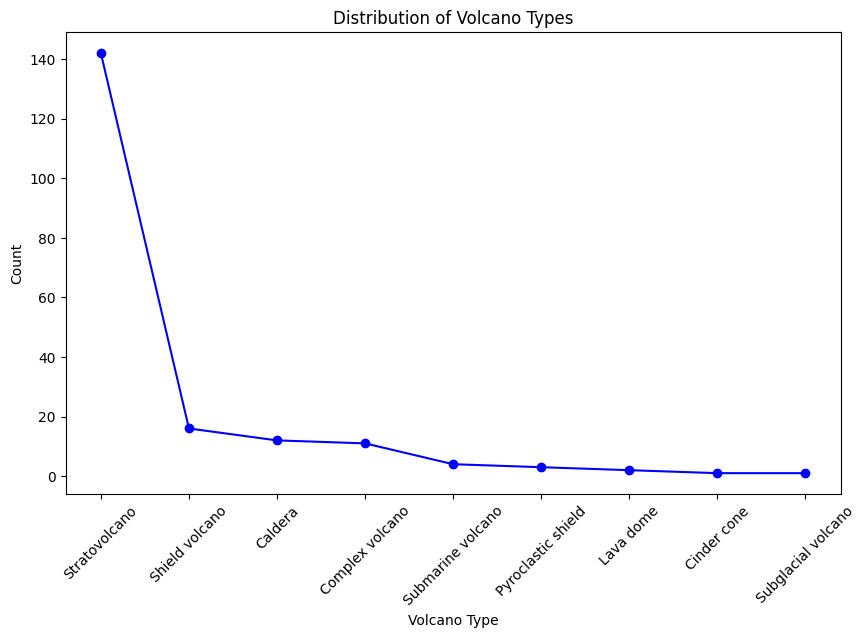

In [13]:
# Count the occurrences of each volcano type
type_counts = df_cleaned['Type'].value_counts()

# Sort the counts in descending order
sorted_type_counts = type_counts.sort_values(ascending=False)

# Plot the line graph
plt.figure(figsize=(10, 6))
sorted_type_counts.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Distribution of Volcano Types')
plt.xlabel('Volcano Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# **Impact Analysis**

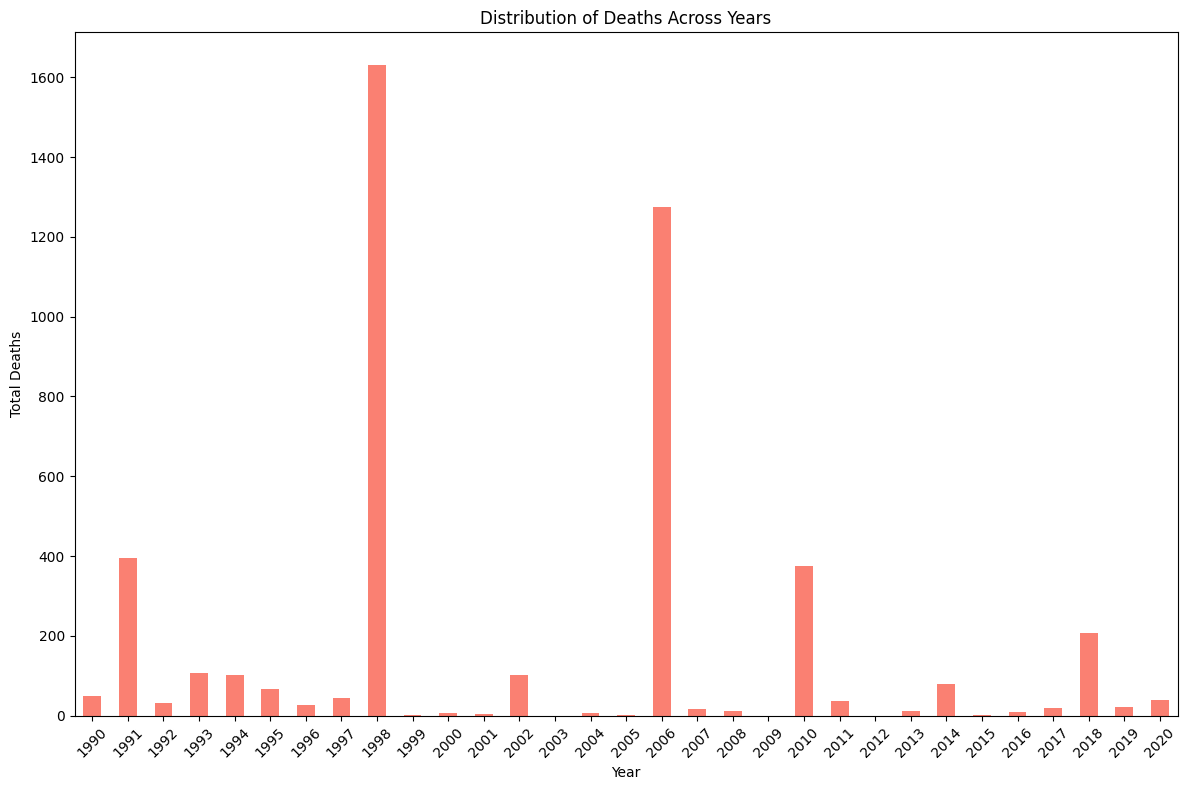

In [14]:
# Group data by year and sum up the deaths
yearly_deaths = df_cleaned.groupby('Year')['Deaths'].sum()

# Plot the bar plot
plt.figure(figsize=(12, 8))
yearly_deaths.plot(kind='bar', color='salmon')
plt.title('Distribution of Deaths Across Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

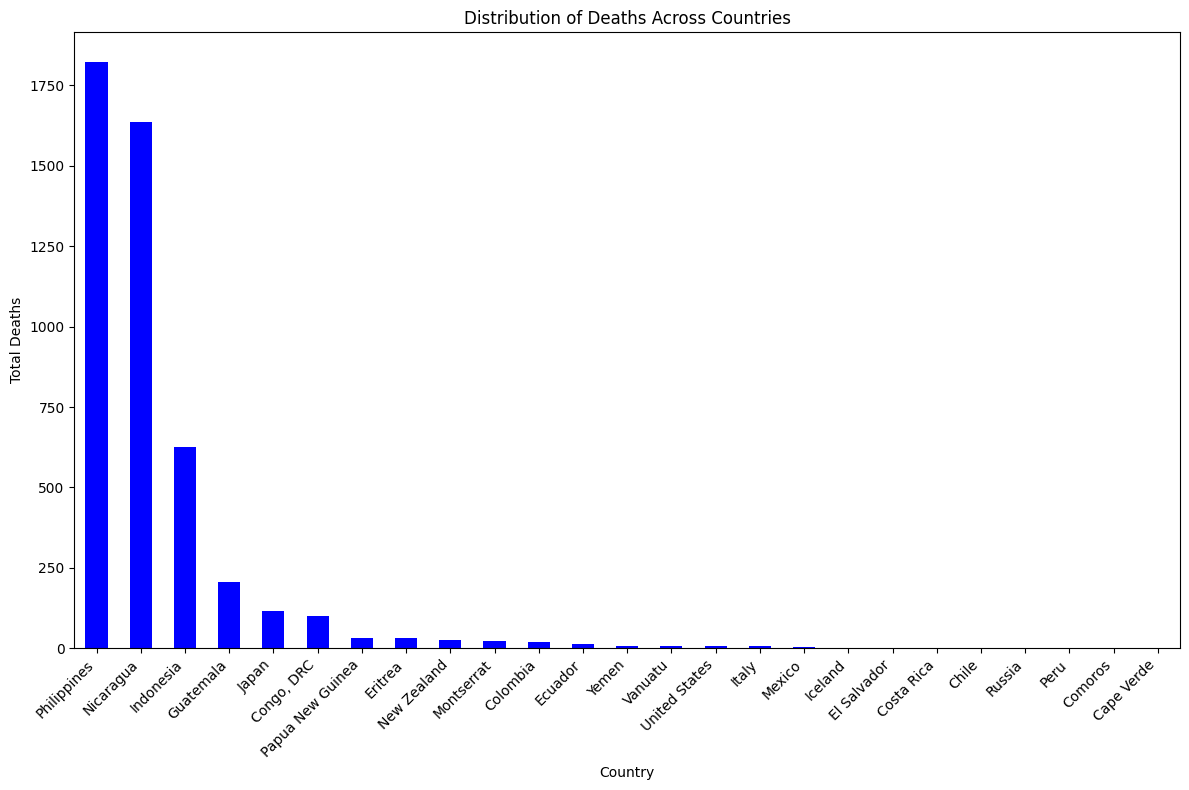

In [15]:
# Group data by country and sum up the deaths
country_deaths = df_cleaned.groupby('Country')['Deaths'].sum()

# Sort the countries by the number of deaths
sorted_country_deaths = country_deaths.sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 8))
sorted_country_deaths.plot(kind='bar', color='blue')
plt.title('Distribution of Deaths Across Countries')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

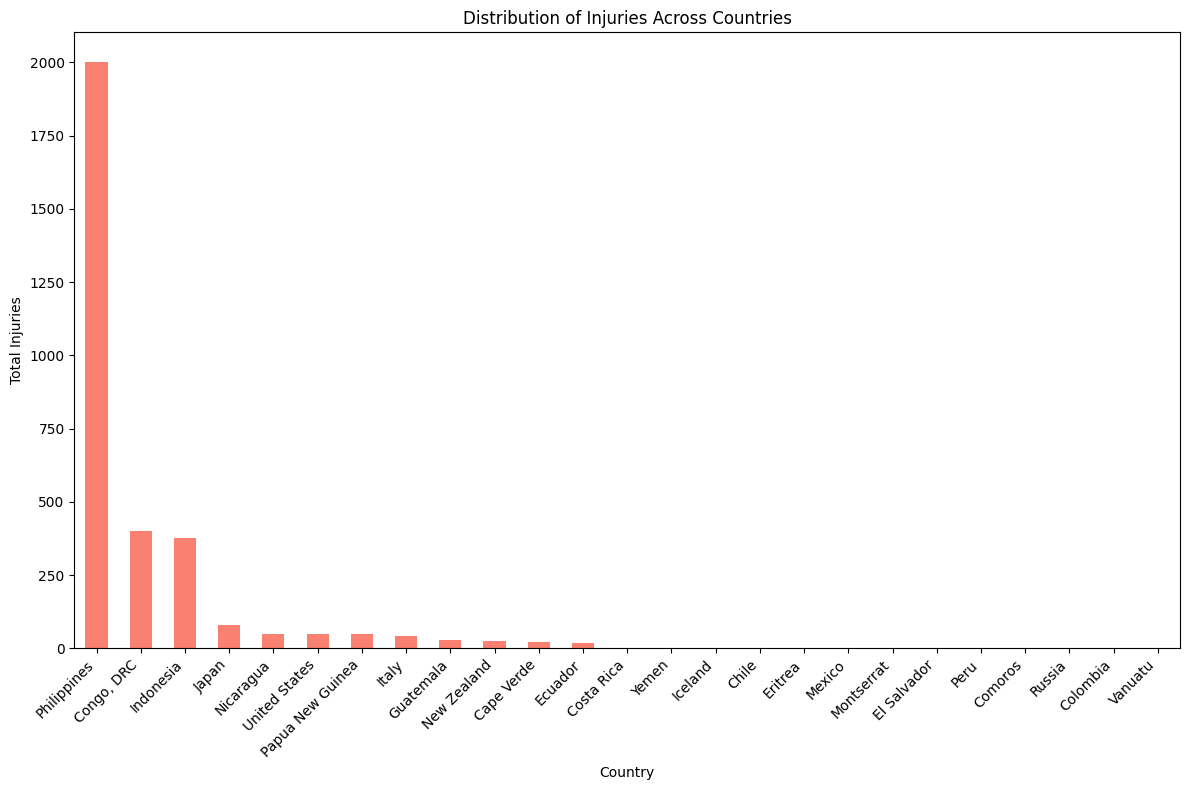

In [16]:
# Group data by country and sum up the injuries
country_injuries = df_cleaned.groupby('Country')['Injuries'].sum()

# Sort the countries by the number of injuries
sorted_country_injuries = country_injuries.sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 8))
sorted_country_injuries.plot(kind='bar', color='salmon')
plt.title('Distribution of Injuries Across Countries')
plt.xlabel('Country')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Text Analysis**

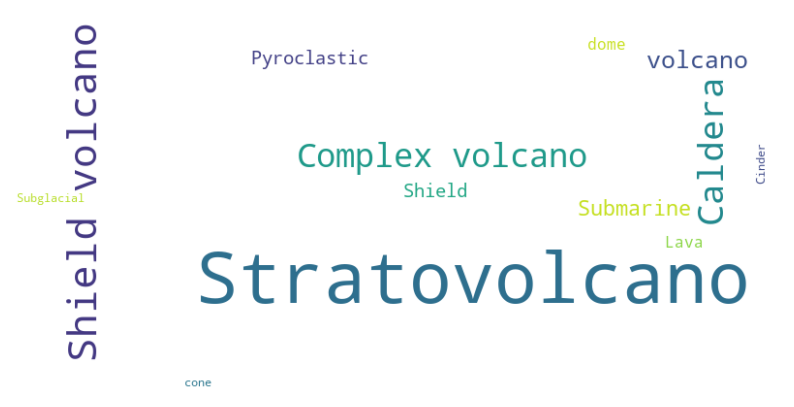

In [17]:
text = ' '.join(df_cleaned['Type'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='red', contour_width=2, min_font_size=10).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('')
plt.axis('off')
plt.show()

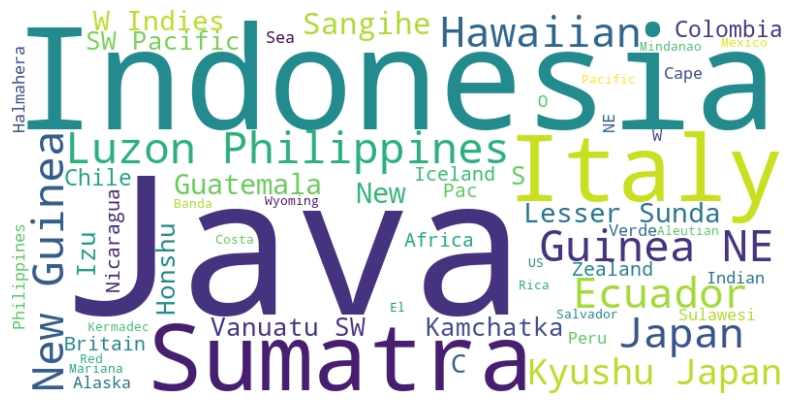

In [18]:
text = ' '.join(df_cleaned['Location'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='yellow', contour_width=2, min_font_size=10).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('')
plt.axis('off')
plt.show()

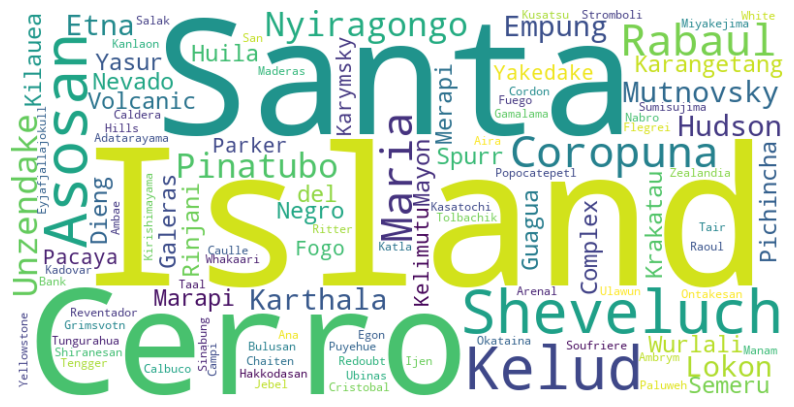

In [19]:
# Get unique volcano names
unique_names = df_cleaned['Name'].unique()

# Concatenate unique volcano names into a single string
text = ' '.join(unique_names)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('')
plt.axis('off')  # Turn off axis
plt.show()

# **Outlier detection**

In [20]:
# Detect outliers in 'DEATHS' using z-score
z_scores = stats.zscore(df_cleaned['Deaths'])
outliers = df_cleaned[(z_scores > 3) | (z_scores < -3)]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Year, Mo, Dy, Name, Location, Country, Latitude, Longitude, Elevation (m), Type, VEI, Deaths, Missing, Injuries, Damage ($Mil), Houses Destroyed, Total Deaths, Total Missing, Total Injuries, Total Damage ($Mil), Total Houses Destroyed]
Index: []

[0 rows x 21 columns]


# **Geospatial Analysis**

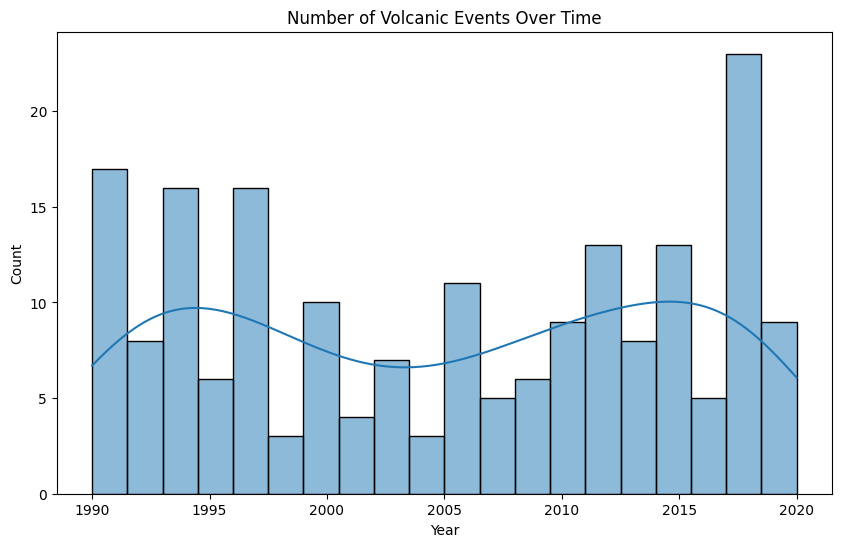

In [21]:
# Temporal trends: Number of volcanic events over time
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Year', bins=20, kde=True)
plt.title('Number of Volcanic Events Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

C:\Users\joann\AppData\Local\Temp\ipykernel_2412\1568977327.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


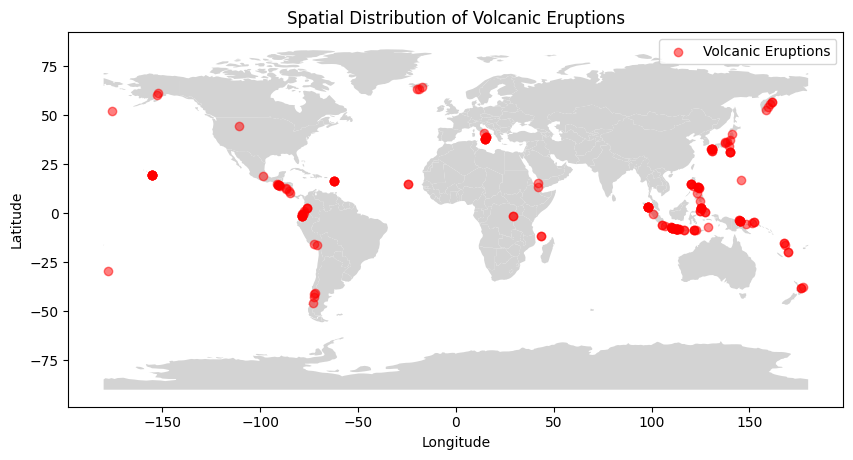

In [23]:
import geopandas as gpd

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot volcanoes on the world map
plt.figure(figsize=(10, 6))
world.plot(ax=plt.gca(), color='lightgrey')
plt.scatter(df_cleaned['Longitude'], df_cleaned['Latitude'], color='red', alpha=0.5, marker='o', label='Volcanic Eruptions')
plt.title('Spatial Distribution of Volcanic Eruptions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

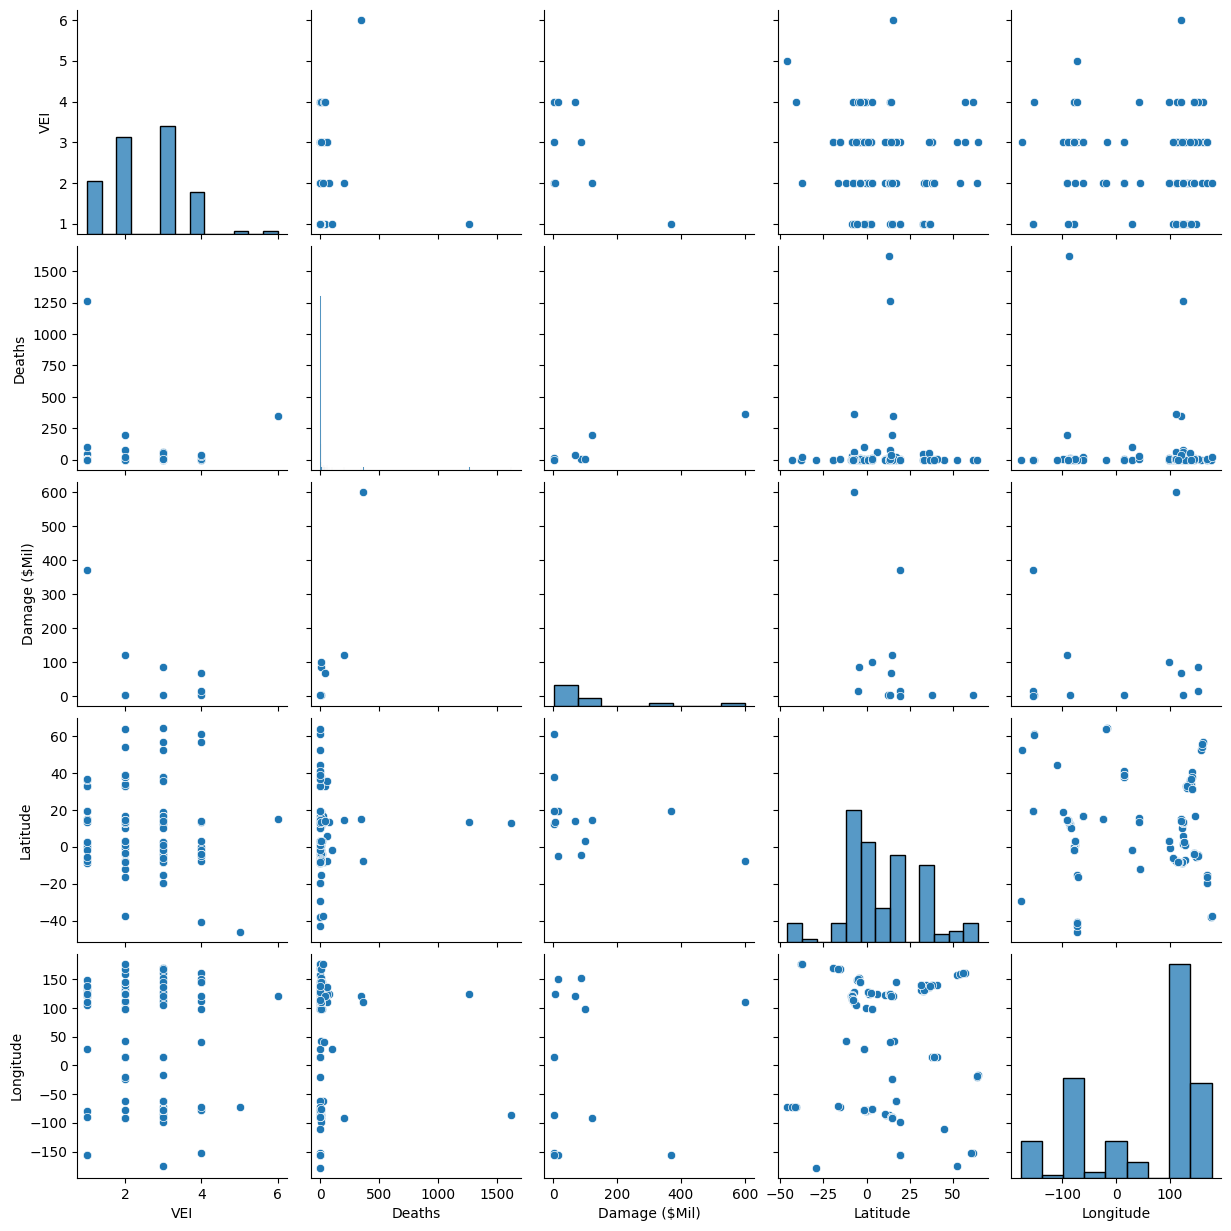

In [24]:
# Scatter Plot Matrix
sns.pairplot(df_cleaned[['VEI', 'Deaths', 'Damage ($Mil)', 'Latitude', 'Longitude']])
plt.show()

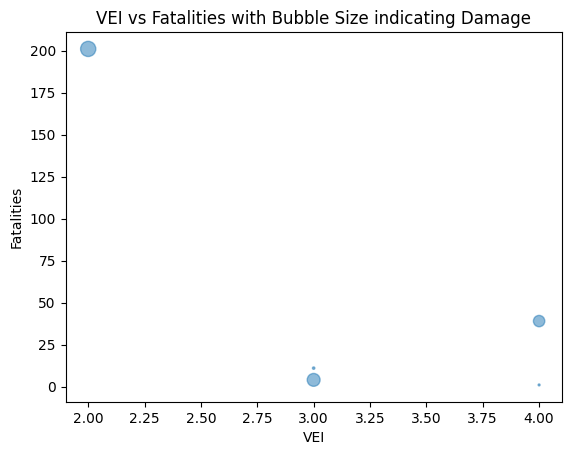

In [25]:
# Bubble Chart
plt.scatter(df_cleaned['VEI'], df_cleaned['Deaths'], s=df_cleaned['Damage ($Mil)'], alpha=0.5)
plt.xlabel('VEI')
plt.ylabel('Fatalities')
plt.title('VEI vs Fatalities with Bubble Size indicating Damage')
plt.show()

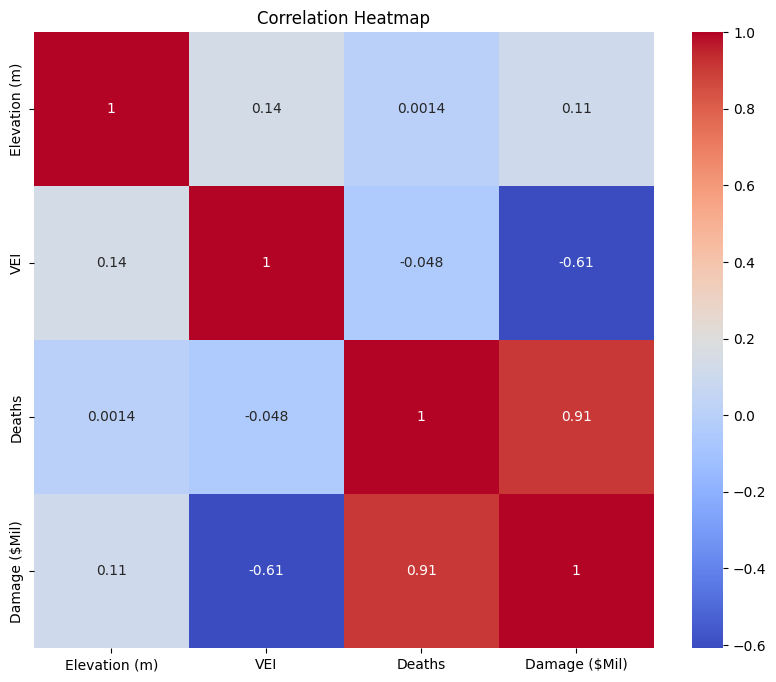

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[['Elevation (m)', 'VEI', 'Deaths', 'Damage ($Mil)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

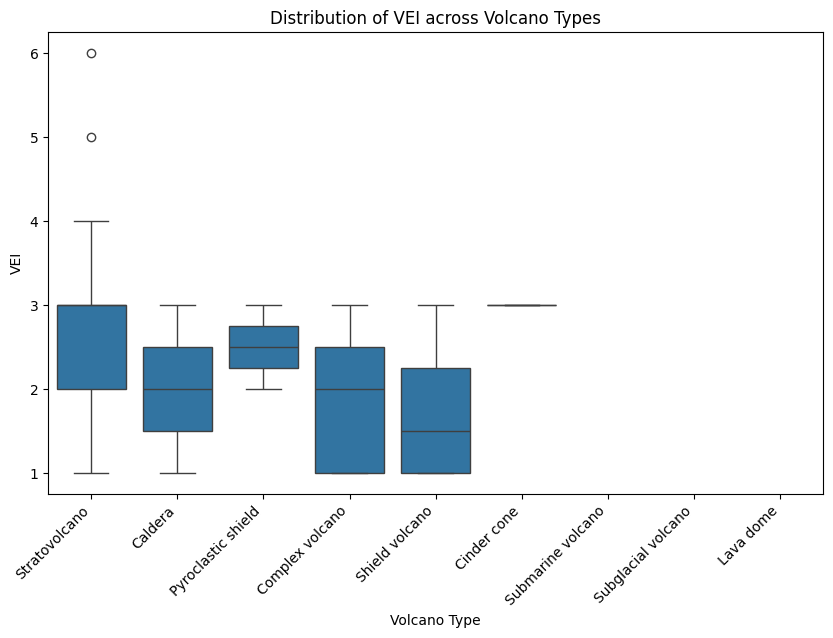

In [27]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Type', y='VEI')
plt.title('Distribution of VEI across Volcano Types')
plt.xlabel('Volcano Type')
plt.ylabel('VEI')
plt.xticks(rotation=45, ha='right')
plt.show()

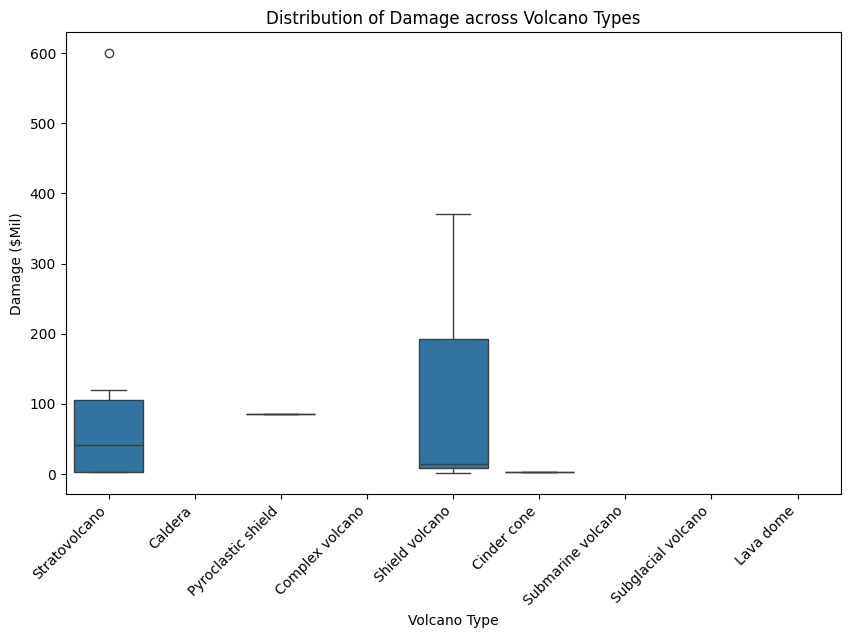

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Type', y='Damage ($Mil)')
plt.title('Distribution of Damage across Volcano Types')
plt.xlabel('Volcano Type')
plt.ylabel('Damage ($Mil)')
plt.xticks(rotation=45, ha='right')
plt.show()

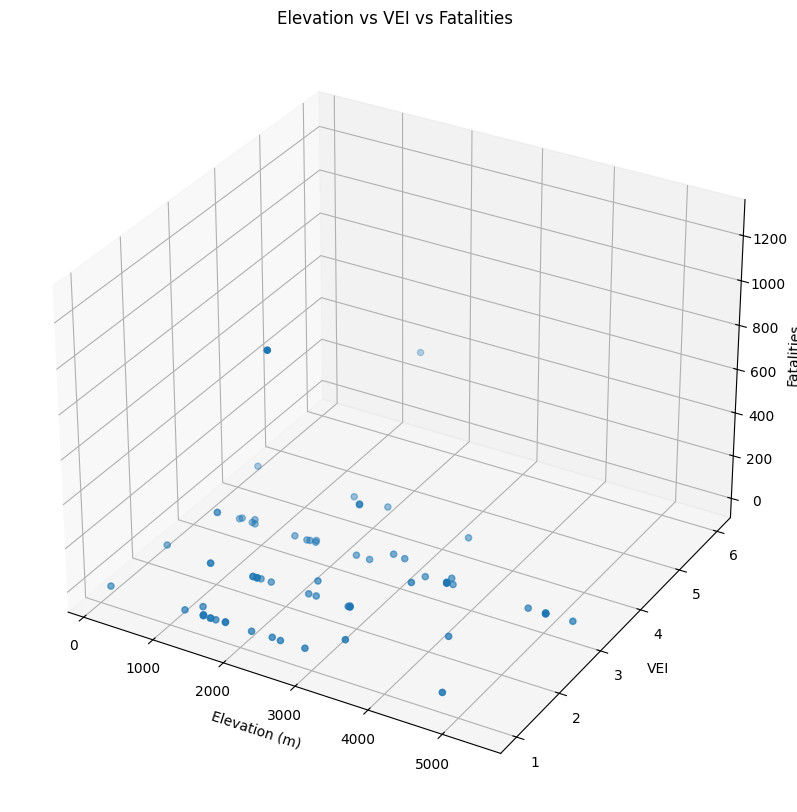

In [29]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cleaned['Elevation (m)'], df_cleaned['VEI'], df_cleaned['Deaths'])
ax.set_xlabel('Elevation (m)')
ax.set_ylabel('VEI')
ax.set_zlabel('Fatalities')
plt.title('Elevation vs VEI vs Fatalities')
#plt.xticks(rotation=45, ha='right')
plt.show()

# **Interactive visualisation**

In [30]:
# Create a map of volcano locations
map_volcanoes = folium.Map(location=[df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()], zoom_start=2)
for index, row in df_cleaned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Name']).add_to(map_volcanoes)
map_volcanoes.save('volcano_map.html')

In [31]:
# Create the interactive scatter plot
fig = px.scatter(df_cleaned, x='Deaths', y='Damage ($Mil)', color='Type', hover_name='Name')
fig.update_layout(title='Volcano Impact: Deaths vs Damage (Millions of Dollars)',
                  xaxis_title='Number of Deaths',
                  yaxis_title='Damage (Millions of Dollars)')

# Save the scatter plot to an HTML file
fig.write_html('volcano_impact_analysis.html')

In [32]:
# Create the map
fig = px.scatter_geo(df_cleaned, lat='Latitude', lon='Longitude', hover_name='Name', scope='world')
fig.update_geos(showcountries=True, countrycolor='black', countrywidth=0.5)
fig.update_layout(title='Geographical Distribution of Volcanoes')

# Save the map to an HTML file
fig.write_html('volcano_geographical_distribution.html')

In [33]:
# Create the map
fig = px.scatter_geo(df_cleaned, lat='Latitude', lon='Longitude', hover_name='Type', scope='world')
fig.update_geos(showcountries=True, countrycolor='black', countrywidth=0.5)
fig.update_layout(title='Geographical Distribution of Volcanoes')

# Save the map to an HTML file
fig.write_html('volcanotype_geographical_distribution.html')

In [34]:
# Create the interactive scatter plot
fig = px.scatter(df_cleaned, x='Deaths', y='Damage ($Mil)', color='Type', hover_name='Name')
fig.update_layout(title='Volcano Impact: Deaths vs Damage (Millions of Dollars)',
                  xaxis_title='Number of Deaths',
                  yaxis_title='Damage (Millions of Dollars)')

# Save the scatter plot to an HTML file
fig.write_html('volcano_impact_analysis.html')

In [35]:
# Save clean data to use in tableau
df_cleaned.to_csv('Volcano_cleaned.csv', index=False)

# **End of Code**